## 1. KMP algorithm, find pattern in string
[an example](https://leetcode.com/problems/shortest-palindrome/discuss/60113/Clean-KMP-solution-with-super-detailed-explanation) <br>
[Java String, StringBuffer, StringBUilder](https://www.journaldev.com/538/string-vs-stringbuffer-vs-stringbuilder)
1. build lps[] array based on pattern, defined as longest prefix which is also proper suffix
```
    Examples of lps[] construction:
    For the pattern “AAAA”, 
    lps[] is [0, 1, 2, 3]

    For the pattern “ABCDE”, 
    lps[] is [0, 0, 0, 0, 0]

    For the pattern “AABAACAABAA”, 
    lps[] is [0, 1, 0, 1, 2, 0, 1, 2, 3, 4, 5]
    NOTE: the 2nd last 4  represent  AABA  AC AABA  A
                                     THIS     THIS

    For the pattern “AAACAAAAAC”, 
    lps[] is [0, 1, 2, 0, 1, 2, 3, 3, 3, 4] 

    For the pattern “AAABAAA”, 
    lps[] is [0, 1, 2, 0, 1, 2, 3]
```
```java
public int[] getTable(String s){
    int[] table = new int[s.length()];
    int index = 0;
    for (int i=1; i<s.length(); i++){
        if (s.charAt(i)==s.charAt(index)) {
            index++;
            table[i] = index;
        } else {
             while(index > 0 && s.charAt(index) != s.charAt(i)){
                //we will try to shorten the match string length until we revert to the beginning of match (index 1)
                index = table[index-1];  //  last valid element in table
            }
            if(s.charAt(index) == s.charAt(i)){
                //if match, then extend one char 
                index ++ ;
            }
            table[i] = index;
        }
    }
    System.out.println(Arrays.toString(table));
    return table;
}
```
2. Search based on lps

In [13]:
def computeLPSArray(pat, M, lps):
    len = 0 # length of the previous longest prefix suffix
 
    lps[0] # lps[0] is always 0
    i = 1
 
    # the loop calculates lps[i] for i = 1 to M-1
    while i < M:
        if pat[i]==pat[len]:
            len += 1
            lps[i] = len
            i += 1
        else:
            # This is tricky. Consider the example.
            # AAACAAAA and i = 7. The idea is similar 
            # to search step.
            if len != 0:
                len = lps[len-1]
 
                # Also, note that we do not increment i here
            else:
                lps[i] = 0
                i += 1
pat = 'abac#caba'
M = len(pat)
lps = [0] * len(pat)
computeLPSArray(pat, M, lps)
print(lps)

[0, 0, 1, 0, 0, 0, 1, 2, 3]


In [37]:
def KMPSearch(pat, txt):
    M = len(pat)
    N = len(txt)
 
    # create lps[] that will hold the longest prefix suffix 
    # values for pattern
    lps = [0]*M
    j = 0 # index for pat[]
 
    # Preprocess the pattern (calculate lps[] array)
    computeLPSArray(pat, M, lps)
    print(lps)
    i = 0 # index for txt[]
    for i in range(len(txt)):
        print(i,j,txt[i], pat[j])
        if pat[j] == txt[i]:
            j += 1
            if j == M:
                print ("Found pattern at index " + str(i-j))
                j = lps[j-1] 
            # mismatch after j matches
        
        elif pat[j] != txt[i] and j!=0:
                print('##############',j,lps[j-1] )
                j = lps[j-1] + 1


In [39]:
KMPSearch('ABABC', 'ABABABCABCABABC')

[0, 0, 1, 2, 0]
0 0 A A
1 1 B B
2 2 A A
3 3 B B
4 4 A C
############## 4 2
5 3 B B
6 4 C C
Found pattern at index 1
7 0 A A
8 1 B B
9 2 C A
############## 2 0
10 1 A B
############## 1 0
11 1 B B
12 2 A A
13 3 B B
14 4 C C
Found pattern at index 9


## [2. Shortest Palindrome](https://leetcode.com/problems/shortest-palindrome/description/)
```
Given a string S, you are allowed to convert it to a palindrome by adding characters in front of it. Find and return the shortest palindrome you can find by performing this transformation.

For example:

Given "aacecaaa", return "aaacecaaa".

Given "abcd", return "dcbabcd".

Credits:
Special thanks to @ifanchu for adding this problem and creating all test cases. Thanks to @Freezen for additional test cases.


```
```java
class Solution {
    public String shortestPalindrome(String s) {
    String temp = s + "#" + new StringBuilder(s).reverse().toString();
    int[] table = getTable(temp);
    
    //get the maximum palin part in s starts from 0   
    //                                    this is how java get last element
    return new StringBuilder(s.substring(table[table.length - 1])).reverse().toString() + s;
}

public int[] getTable(String s){
    int[] table = new int[s.length()];
    int index = 0;
    for (int i=1; i<s.length(); i++){
        if (s.charAt(i)==s.charAt(index)) {
            index++;
            table[i] = index;
        } else {
             while(index > 0 && s.charAt(index) != s.charAt(i)){
                //we will try to shorten the match string length until we revert to the beginning of match (index 1)
                index = table[index-1];  //  last valid element in table
            }
            if(s.charAt(index) == s.charAt(i)){
                //if match, then extend one char 
                index ++ ;
            }
            table[i] = index;
        }
    }
    System.out.println(Arrays.toString(table));
    return table;
}
}
```

## [3. Suffix array](https://en.wikipedia.org/wiki/Suffix_array)
[suffix tree](https://www.geeksforgeeks.org/pattern-searching-set-8-suffix-tree-introduction/)

## [4. Rabin-Karp Algorithm](https://www.geeksforgeeks.org/?p=11937)
Rabin Karp algorithm needs to calculate **hash values** for following strings.

1) Pattern itself. <br>
2) All the substrings of text of length m.

In [50]:
def search(pat, txt, q):
    # d is the number of characters in input alphabet
    d = 256
    M = len(pat)
    N = len(txt)
    i = 0
    j = 0
    p = 0    # hash value for pattern
    t = 0    # hash value for txt
    h = 1
     
    # The value of h would be "pow(d, M-1)%q"
    for i in range(M-1):
        h = (h*d)%q
 
    # Calculate the hash value of pattern and first window
    # of text
    """
    hash function is a polynomial here, based on the position of chr in string
    Hash do not garentee 100% accuracy
    """
    for i in range(M):
        p = (d*p + ord(pat[i]))%q
        t = (d*t + ord(txt[i]))%q
    print(h, p, t)
    # Slide the pattern over text one by one
    for i in range(N-M+1):
        # Check the hash values of current window of text and
        # pattern if the hash values match then only check
        # for characters on by one
        if p==t:
            # Check for characters one by one
            for j in range(M):
                if txt[i+j] != pat[j]:
                    break
 
            j+=1
            # if p == t and pat[0...M-1] = txt[i, i+1, ...i+M-1]
            if j==M:
                print ("Pattern found at index " + str(i))
 
        # Calculate hash value for next window of text: Remove
        # leading digit, add trailing digit
        if i < N-M:
            t = (d*(t-ord(txt[i])*h) + ord(txt[i+M]))%q
 
            # We might get negative values of t, converting it to
            # positive
            if t < 0:
                t = t+q
 
# Driver program to test the above function
txt = "GEEKS FOR GEEKS"
pat = "GEEK"
q = 97 # A prime number
search(pat,txt,q)
 
# This code is contributed by Bhavya Jain

96 52 52
Pattern found at index 0
Pattern found at index 10


## [5. Boyer Moore Algorithm](https://www.geeksforgeeks.org/pattern-searching-set-7-boyer-moore-algorithm-bad-character-heuristic/)
Boyer Moore is a combination of following two approaches.

1) Bad Character Heuristic <br>
2) Good Suffix Heuristic

The Boyer Moore algorithm does preprocessing for the same reason. It preporcesses the pattern and creates different arrays for both heuristics. At every step, it slides the pattern by **max of the slides suggested by the two heuristics**. So it uses best of the two heuristics at every step. <br>
Unlike the previous pattern searching algorithms, Boyer Moore algorithm starts matching from the last character of the pattern.
### 5.1 Bad Character heuristic
**Case 1 – Mismatch become match <br>**
We will lookup the position of last occurence of mismatching character in pattern and if mismatching character exist in pattern then we’ll shift the pattern such that it get aligned to the mismatching character in text T.
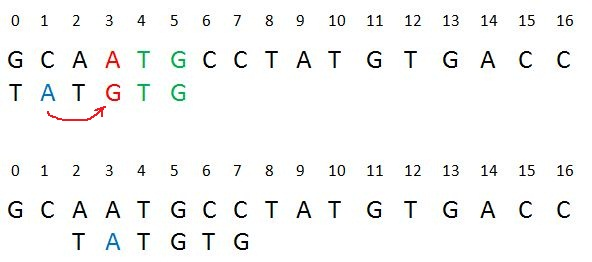
**Explanation:** In the above example, we got a mismatch at position 3. Here our mismatching character is “A”. Now we will search for last occurence of “A” in pattern. We got “A” at position 1 in pattern (displayed in Blue) and this is the last occurence of it. Now we will shift pattern 2 times so that “A” in pattern get aligned with “A” in text.

**Case 2 – Pattern move past the mismatch character**
![image2](images/bad_match_heuristic_case_2.jpg)
If **do not exist**, just go cross it
### [5.2 Good Suffix heuristic](https://www.geeksforgeeks.org/boyer-moore-algorithm-good-suffix-heuristic/)
